# 主成分分析による気象情報の解析

## 特異値分解（SVD）


SVDは、任意のデータ行列$\boldsymbol X$は、分解すると$\boldsymbol U$,$\boldsymbol V$を直交行列、$\boldsymbol S$を特異値$s_i$を対角成分とする対角行列とすると、

$$\boldsymbol X = \boldsymbol U \boldsymbol S \boldsymbol V^T$$
と書けることを表す。

主成分分析では、固有値問題を解くことで次元圧縮を行ったが、SVDでは特異値を用いるという相違点がある。

主成分分析とSVDの関連性として、データの分散をできるだけ維持することが重要となるため、分散行列$\boldsymbol \Sigma$を考えると、

$$\boldsymbol \Sigma = \frac{\boldsymbol X^T \boldsymbol X}{n-1} $$

となる。ここで、$\boldsymbol X^T \boldsymbol X$について、SVDを用いると、

$$\boldsymbol X^T \boldsymbol X = [\boldsymbol U \boldsymbol S \boldsymbol V^T]^T[\boldsymbol U \boldsymbol S \boldsymbol V^T]= \boldsymbol V \boldsymbol S^T \boldsymbol U^T \boldsymbol U \boldsymbol S \boldsymbol V^T$$

とかける。ここで、$\boldsymbol U$は直交行列、$\boldsymbol S$は対角行列より、
$$\boldsymbol X^T \boldsymbol X = \boldsymbol V \boldsymbol S^2\boldsymbol V^T$$
となる。よって、

$$\boldsymbol \Sigma = \frac{\boldsymbol X^T \boldsymbol X}{n-1} = \frac{\boldsymbol V \boldsymbol S^2\boldsymbol V^T}{n-1} $$

となる。ここで、$\boldsymbol \Lambda$を固有値$λ_i$を対角成分とする対角行列として、主成分分析では

$$\boldsymbol \Sigma  = \boldsymbol V \boldsymbol \Lambda \boldsymbol V^T$$

とかけることと、$\boldsymbol \Lambda $と$\boldsymbol S $が対角行列であることから、主成分分析による固有値$λ_i$とSVDの特異値$s_i$との間には

$$λ_i = \frac{s_i^2}{n-1}$$

という関係が成り立つ。



## 主成分分析


気象庁が提供している過去の気象データ(https://www.data.jma.go.jp/gmd/risk/obsdl/)
から、東京都の2020/2/6から1年間の最高気温、最低気温、降水量の合計、日照時間、平均風速、平均雲量のデータを用いた。

In [ ]:
import pandas as pd 
data= pd.read_csv('/content/whether.csv', encoding="shift-jis")

data['年月日'] = pd.to_datetime(data['年月日'])
data = data.set_index('年月日')
data

,最高気温(℃),最低気温(℃),降水量の合計(mm),日照時間(時間),平均風速(m/s),平均雲量(10分比)
年月日,,,,,,
2020-02-06,6.9,-0.4,0.0,9.4,4.9,2.5
2020-02-07,6.9,-2.1,0.0,8.4,2.0,7.3
2020-02-08,12.7,0.7,0.0,9.2,2.4,5.0
2020-02-09,8.3,1.2,0.0,9.7,4.0,0.0
2020-02-10,10.1,-0.2,0.0,7.3,2.2,2.8
...,...,...,...,...,...,...
2021-02-02,15.6,4.3,12.0,4.2,3.2,7.3
2021-02-03,11.8,1.0,0.0,9.0,2.0,1.3
2021-02-04,12.6,0.6,0.0,9.5,2.9,0.0


In [ ]:
data = data.iloc[:,:].apply(lambda x: (x-x.mean())/x.std(), axis=0)
data = data.set_index(data.index.month)
data

,最高気温(℃),最低気温(℃),降水量の合計(mm),日照時間(時間),平均風速(m/s),平均雲量(10分比)
年月日,,,,,,
2,-1.786349,-1.570616,-0.334427,0.998423,2.357789,-1.310479
2,-1.786349,-1.776078,-0.334427,0.756752,-0.820269,0.175929
2,-1.049359,-1.437671,-0.334427,0.950089,-0.381916,-0.536308
2,-1.608455,-1.377241,-0.334427,1.070924,1.371495,-2.084650
2,-1.379734,-1.546444,-0.334427,0.490914,-0.601093,-1.217578
...,...,...,...,...,...,...
2,-0.680865,-1.002576,0.640626,-0.258265,0.494789,0.175929
2,-1.163720,-1.401413,-0.334427,0.901755,-0.820269,-1.682081
2,-1.062066,-1.449757,-0.334427,1.022590,0.166025,-2.084650


In [ ]:
import numpy as np
features = data.astype('float64').values
print(features)
print(data.index)
X = features
Y = data.index

[[-1.78634851 -1.57061634 -0.33442743  0.99842317  2.35778936 -1.31047897]
 [-1.78634851 -1.77607784 -0.33442743  0.75675234 -0.82026943  0.1759287 ]
 [-1.04935944 -1.43767066 -0.33442743  0.950089   -0.38191649 -0.53630831]
 ...
 [-1.06206614 -1.44975663 -0.33442743  1.02259025  0.16602468 -2.08464963]
 [-1.08747956 -1.29263902 -0.33442743  0.87758775 -0.38191649 -0.84597657]
 [-0.75710515 -1.01466169 -0.33442743  0.99842317 -1.14903413 -1.52724676]]
Int64Index([2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
            ...
            1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
           dtype='int64', name='年月日', length=367)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
P = pca.fit_transform(X)

#第一主成分と第二主成分のベクトル
print("第1主成分:", pca.components_[0])
print("第2主成分:", pca.components_[1])

第1主成分: [-0.4364819  -0.54409969 -0.24686737  0.40543451 -0.10192199 -0.52700127]
第2主成分: [-0.51648529 -0.37059823  0.31846227 -0.51977581 -0.34213152  0.32750697]


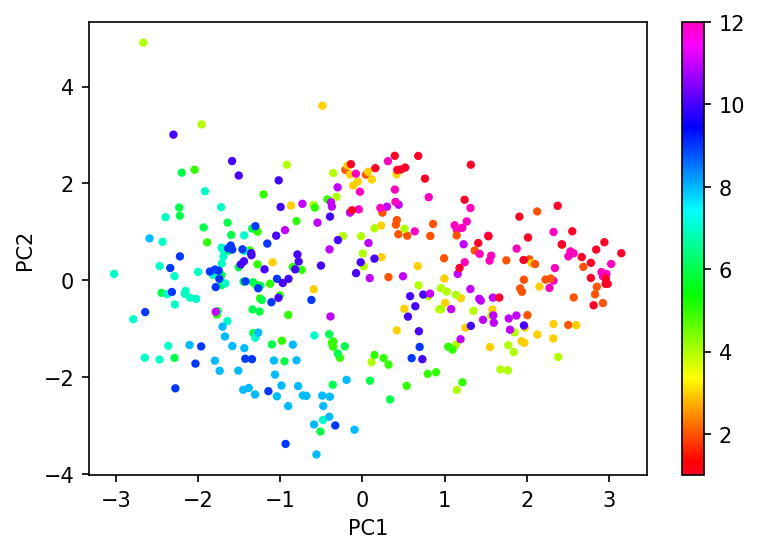

In [ ]:
import matplotlib.pyplot as plt
plt.figure(dpi=150)

m = plt.scatter(P[:, 0], P[:, 1], c=data.index, marker='.', cmap='gist_rainbow')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(m)
fig.show()

以上の主成分分析から、各月が特徴量によって区別できることが分かった。また、各月の特徴量のプロットカラーをグラデーションにしたことで、特に季節による特徴が明確に表れた。主に夏と冬はそれぞれ明確にまとまっており、春や秋はその中間あたりに分布していることが分かった。この結果は直感的な季節ごとの天候の特徴がグラフに反映されたといえる。

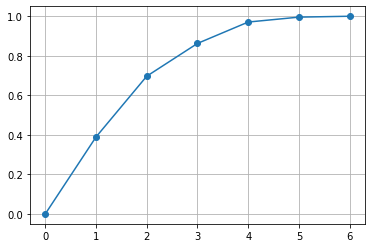

In [ ]:
import matplotlib.ticker as ticker
#累積寄与率のグラフ
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list(np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.grid()
plt.show()

以上の累積寄与率のグラフから、今回の主成分分析ではデータ全体の分散の約70%が反映できたといえる。